<a href="https://colab.research.google.com/github/visheshagrawal/Course-ComputationalGastronomy/blob/main/CGAS_A2_2018420.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import random
import copy
from cycler import cycler 
import matplotlib.pyplot as plt

#preparing the dataset
train_set = pd.read_json("train.json")
initial_recipe_count=len(train_set["id"].unique())

In [ ]:
df=train_set.explode("ingredients").reset_index()
df.head()
nature_basket=df["ingredients"].unique()
nature_basket=list(nature_basket)


In [ ]:
def chunks(lst, n):
    """Yield successive n-sized chunks from lst."""
    a=[]
    for i in range(0, len(lst), n):
        a.append(lst[i:i + n])
    return a

In [ ]:
# We have almost 40000 recipes in the train.json so we will taske our target as 40K recipes. We have 5 epochs, so after every each epoch 8K recipes needs to be added. 
# We have 6714 ingredients in our nature basket so we divide it into 5 parts and after each epoch we add the next part starting with the 1st part

random.shuffle(nature_basket)

num_epochs=5

kb_size_epoch=round(len(nature_basket)/num_epochs)

basket_chunks=chunks(nature_basket,kb_size_epoch)

len(basket_chunks)

fitness_dic={}

random.shuffle(nature_basket)

for i in range(len(nature_basket)):
  fitness_dic[nature_basket[i]]=np.random.rand()


In [ ]:
# Primordial Cusisine

kitchen_basket=basket_chunks[0]
recipes=[]
primord_size=500
recipe_size=10
recipe_count_epoch=round(initial_recipe_count/num_epochs)

# primord recipes initialized randomly
for i in range(primord_size):
  recipes.append(random.sample(kitchen_basket, recipe_size))


# Primordial cuisine from kitchen basket is made. 
# print(recipes[0:5])

A1: CM model with only replacement based on fitness

In [ ]:
#Q1
#Copy Mutate Algo for only replacing
# 5 epochs is being taken 
arr_rec=[]
for i in range(num_epochs):
  print(i)
  if (i==0):
    total_count=recipe_count_epoch-primord_size
    #total_count=5
  else:
    total_count=recipe_count_epoch
    #total_count=5
  count=0
  while (count<total_count):
    rand_recipe=copy.deepcopy(random.choice(recipes))
    rand_recipe_ing=random.choice(rand_recipe)
    rand_basket_ing=random.choice(kitchen_basket)
    if (fitness_dic[rand_basket_ing]>fitness_dic[rand_recipe_ing]):
      rand_recipe.append(rand_basket_ing)
      rand_recipe.remove(rand_recipe_ing)
      rand_recipe.sort()
      if (rand_recipe not in recipes):
        recipes.append(rand_recipe)
        count+=1
        print(rand_basket_ing,rand_recipe_ing,fitness_dic[rand_basket_ing],fitness_dic[rand_recipe_ing],count)

  temp_rec=copy.deepcopy(recipes)
  arr_rec.append(temp_rec)

  if (i<num_epochs-1):
    kitchen_basket.extend(basket_chunks[i+1])





[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7955, 0, 0, 0, 0]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 15910, 0, 0, 0, 0]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 23865, 0, 0, 0, 0]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 31820, 0, 0, 0, 0]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 39775, 0, 0, 0, 0]


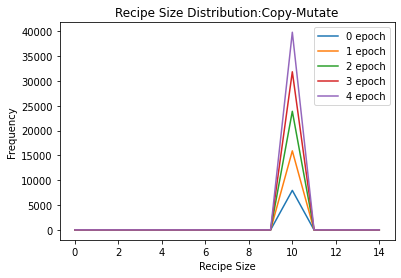

In [ ]:
recipe_size_plot(arr_rec)

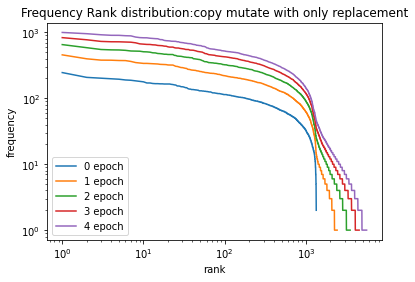

In [ ]:
for epoch in range(len(arr_rec)):
  hash={}
  for i in arr_rec[epoch]:
    for j in i:
      if j not in hash:
        hash[j]=1
      else:
        hash[j]+=1
  #We get hash
  frequency_list=list(hash.values())
  frequency_list.sort(reverse=True)
  rank=[i+1 for i in range(len(frequency_list))]
  plt.loglog(rank,frequency_list,label='%s epoch' % epoch)
  plt.ylabel('frequency')
  plt.xlabel('rank')
  plt.title('Frequency Rank distribution:copy mutate with only replacement')
plt.legend()
  # plt.show()




A2: CM model with random Replacement, Addition and Deletion

In [ ]:
#### Q2 with all 3
arr_rec=[]
for i in range(num_epochs):
  print(i)
  if (i==0):
    total_count=recipe_count_epoch-primord_size
    #total_count=15
  else:
    total_count=recipe_count_epoch
    #total_count=15
  count=0
  while (count<total_count):
    rand_recipe=copy.deepcopy(random.choice(recipes))
    choice = random.randint(1,4)
    if (choice==1 or choice==2):
      rand_recipe_ing=random.choice(rand_recipe)
      rand_basket_ing=random.choice(kitchen_basket)
      if (fitness_dic[rand_basket_ing]>fitness_dic[rand_recipe_ing]):
        rand_recipe.append(rand_basket_ing)
        rand_recipe.remove(rand_recipe_ing)
        rand_recipe.sort()
        if (rand_recipe not in recipes):
          recipes.append(rand_recipe)
          count+=1
          print(rand_basket_ing,rand_recipe_ing,fitness_dic[rand_basket_ing],fitness_dic[rand_recipe_ing],count)
    elif (choice==3):
      rand_basket_ing=random.choice(kitchen_basket)
      rand_recipe.append(rand_basket_ing)
      rand_recipe.sort()
      if (rand_recipe not in recipes):
        recipes.append(rand_recipe)
        count+=1
        print(rand_basket_ing,fitness_dic[rand_basket_ing],count)
    else:
      rand_recipe_ing=random.choice(rand_recipe)
      if (len(rand_recipe)>2):
        rand_recipe.remove(rand_recipe_ing)
        rand_recipe.sort()
        if (rand_recipe not in recipes):
          recipes.append(rand_recipe)
          count+=1
          print(rand_recipe_ing,fitness_dic[rand_recipe_ing],count)
    
  temp_rec=copy.deepcopy(recipes)
  arr_rec.append(temp_rec)
  if (i<num_epochs-1):
    kitchen_basket.extend(basket_chunks[i+1])




Streaming output truncated to the last 5000 lines.
pomegranate seeds 0.03500469282989893 2956
bertolli four chees rosa sauc andouille sausage 0.38735548011419374 0.18270270595177118 2957
dried soba 0.7737958261749128 2958
milk chocolate kisses 0.27784981619191274 2959
pork shoulder boston butt 0.32499587606071 2960
peeled tomatoes 0.02216549208591967 2961
potato gnocchi 0.8403023445031433 2962
whiskey beef cheek 0.565168334715464 0.5533431336736188 2963
orange segments 0.6814990840111328 2964
Ragu Traditional Sauce 0.8241148218616494 2965
beef 0.41080909028602386 2966
edamame beans 0.40116825006867174 2967
brown hash potato 0.613026747707277 2968
knorr tomato bouillon with chicken flavor cube anise 0.7398776179408015 0.03830681207290443 2969
low-fat greek yogurt 0.009491622724299265 2970
agave nectar 0.43005636452031626 2971
lipton pure leaf unsweeten iced tea 0.792896394538141 2972
grit quick 0.7931963322155892 2973
sweet bean sauce 0.12142859462837707 2974
ragu old world style pasta 

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
[0, 0, 0, 0, 3, 17, 59, 234, 764, 1756, 2570, 1648, 665, 194, 42, 3, 0, 0, 0, 0]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
[0, 0, 0, 2, 13, 52, 187, 647, 1639, 3407, 4564, 3214, 1499, 514, 148, 21, 3, 0, 0, 0, 0]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]
[0, 0, 0, 6, 19, 103, 335, 1074, 2597, 5002, 6393, 4738, 2371, 889, 270, 54, 11, 3, 0, 0, 0, 0]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]
[0, 0, 1, 9, 33, 156, 529, 1535, 3500, 6521, 8189, 6227, 3314, 1297, 407, 81, 16, 5, 0, 0, 0, 0]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]
[0, 0, 3, 13, 52, 211, 708, 1928, 4454, 8013, 9903, 7702, 4299, 1762, 575, 120, 25, 7, 0, 0, 0, 0]


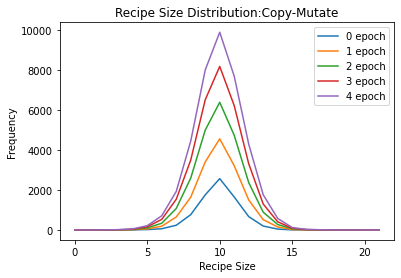

In [ ]:
recipe_size_plot(arr_rec)

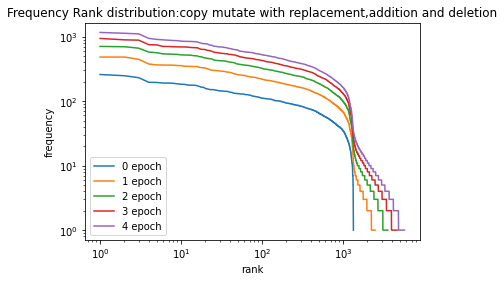

In [ ]:
for epoch in range(len(arr_rec)):
  hash={}
  for i in arr_rec[epoch]:
    for j in i:
      if j not in hash:
        hash[j]=1
      else:
        hash[j]+=1
  #We get hash
  frequency_list=list(hash.values())
  frequency_list.sort(reverse=True)
  rank=[i+1 for i in range(len(frequency_list))]
  plt.loglog(rank,frequency_list,label='%s epoch' % epoch)
  plt.ylabel('frequency')
  plt.xlabel('rank')
  plt.title('Frequency Rank distribution:copy mutate with replacement,addition and deletion')
plt.legend()
  # plt.show()

In [ ]:
def recipe_size_plot(array_recipes):
  label=["1","2","3","4","5"]
  for z in range(len(array_recipes)):
    apple=list(map(len,array_recipes[z]))
    freq = {} 
    for items in apple: 
        freq[items] = apple.count(items)
    a=[]
    for k in range(max(apple)+5):
      a.append(0)
    for k,j in freq.items():
      a[k]=j

    y=[]
    for k in range(max(apple)+5):
      y.append(k)
    
    print(y)
    print(a)

    plt.plot(y,a,label='%s epoch' % z)
    plt.xlabel("Recipe Size")
    plt.ylabel("Frequency")
    plt.title("Recipe Size Distribution:Copy-Mutate")
  plt.legend()


    
